In [9]:
!pip install mlxtend

     |████████████████████████████████| 1.3MB 2.3MB/s eta 0:00:01��██████ | 1.3MB 2.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# coding: utf-8
import pandas as pd
import numpy as np

In [5]:
df_orig = pd.read_csv('Retail_Data.csv')
df_orig.head(10)

,Trans_ID,Product1,Product2,Product3
0,1,Bread,Butter,Dairy
1,2,Nachos,Butter,Dairy
2,3,Juice,Jam,Egg
3,4,Juice,Jam,Egg
4,5,Juice,Vegetable,Salad
5,6,Bread,Butter,Egg
6,7,Nachos,Salsa,Dairy
7,8,Bread,Jam,Egg
8,9,Juice,Jam,Egg
9,10,Fruits,Vegetable,Salad


In [6]:
df = pd.get_dummies(df_orig, prefix='', prefix_sep='')
df.head(10)

,Trans_ID,Bread,Fruits,Juice,Nachos,Butter,Jam,Salsa,Vegetable,Dairy,Egg,Salad
0,1,1,0,0,0,1,0,0,0,1,0,0
1,2,0,0,0,1,1,0,0,0,1,0,0
2,3,0,0,1,0,0,1,0,0,0,1,0
3,4,0,0,1,0,0,1,0,0,0,1,0
4,5,0,0,1,0,0,0,0,1,0,0,1
5,6,1,0,0,0,1,0,0,0,0,1,0
6,7,0,0,0,1,0,0,1,0,1,0,0
7,8,1,0,0,0,0,1,0,0,0,1,0
8,9,0,0,1,0,0,1,0,0,0,1,0
9,10,0,1,0,0,0,0,0,1,0,0,1


In [7]:
df.drop('Trans_ID',axis=1,inplace=True)

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_items = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Bread),0.2465,0.3510,0.2145,0.870183,2.479153,0.127978,4.999328
1,(Bread),(Butter),0.3510,0.2465,0.2145,0.611111,2.479153,0.127978,1.937571
2,(Jam),(Bread),0.3410,0.3510,0.1280,0.375367,1.069420,0.008309,1.039009
3,(Bread),(Jam),0.3510,0.3410,0.1280,0.364672,1.069420,0.008309,1.037260
4,(Dairy),(Bread),0.2030,0.3510,0.1005,0.495074,1.410467,0.029247,1.285337


In [21]:
rules.sort_values(by='lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50,(Fruits),"(Jam, Salad)",0.1825,0.0120,0.0120,0.065753,5.479452,0.009810,1.057537
49,"(Jam, Salad)",(Fruits),0.0120,0.1825,0.0120,1.000000,5.479452,0.009810,inf
83,(Salsa),"(Egg, Nachos)",0.1965,0.1175,0.1175,0.597964,5.089059,0.094411,2.195079
82,"(Egg, Nachos)",(Salsa),0.1175,0.1965,0.1175,1.000000,5.089059,0.094411,inf
71,(Dairy),"(Butter, Nachos)",0.2030,0.0320,0.0320,0.157635,4.926108,0.025504,1.149146
70,"(Butter, Nachos)",(Dairy),0.0320,0.2030,0.0320,1.000000,4.926108,0.025504,inf
64,"(Juice, Salad)",(Vegetable),0.0385,0.2160,0.0385,1.000000,4.629630,0.030184,inf
67,(Vegetable),"(Juice, Salad)",0.2160,0.0385,0.0385,0.178241,4.629630,0.030184,1.170051
85,(Nachos),"(Salsa, Egg)",0.2200,0.1175,0.1175,0.534091,4.545455,0.091650,1.894146
80,"(Salsa, Egg)",(Nachos),0.1175,0.2200,0.1175,1.000000,4.545455,0.091650,inf


In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
dist = frequent_items.support
Z = linkage(dist, method='complete')

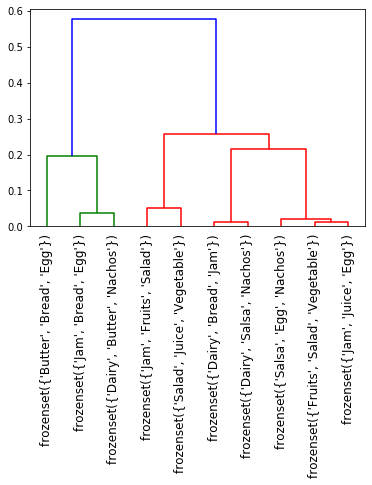

In [14]:
from matplotlib import pyplot as plt
plt.figure()
dn = dendrogram(Z, labels=frequent_items.itemsets.tolist())
plt.xticks(rotation=90)
plt.show()

In [15]:
type(rules)

pandas.core.frame.DataFrame

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Bread),0.2465,0.3510,0.2145,0.870183,2.479153,0.127978,4.999328
1,(Bread),(Butter),0.3510,0.2465,0.2145,0.611111,2.479153,0.127978,1.937571
2,(Jam),(Bread),0.3410,0.3510,0.1280,0.375367,1.069420,0.008309,1.039009
3,(Bread),(Jam),0.3510,0.3410,0.1280,0.364672,1.069420,0.008309,1.037260
4,(Dairy),(Bread),0.2030,0.3510,0.1005,0.495074,1.410467,0.029247,1.285337
